In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# import SVM
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# import encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# customer_satisfaction.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('customer_satisfaction.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'customer_satisfaction.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 23 columns


Let's take a quick look at what the data looks like:

In [ ]:
df1.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Distribution graphs (histogram/bar graph) of sampled columns:

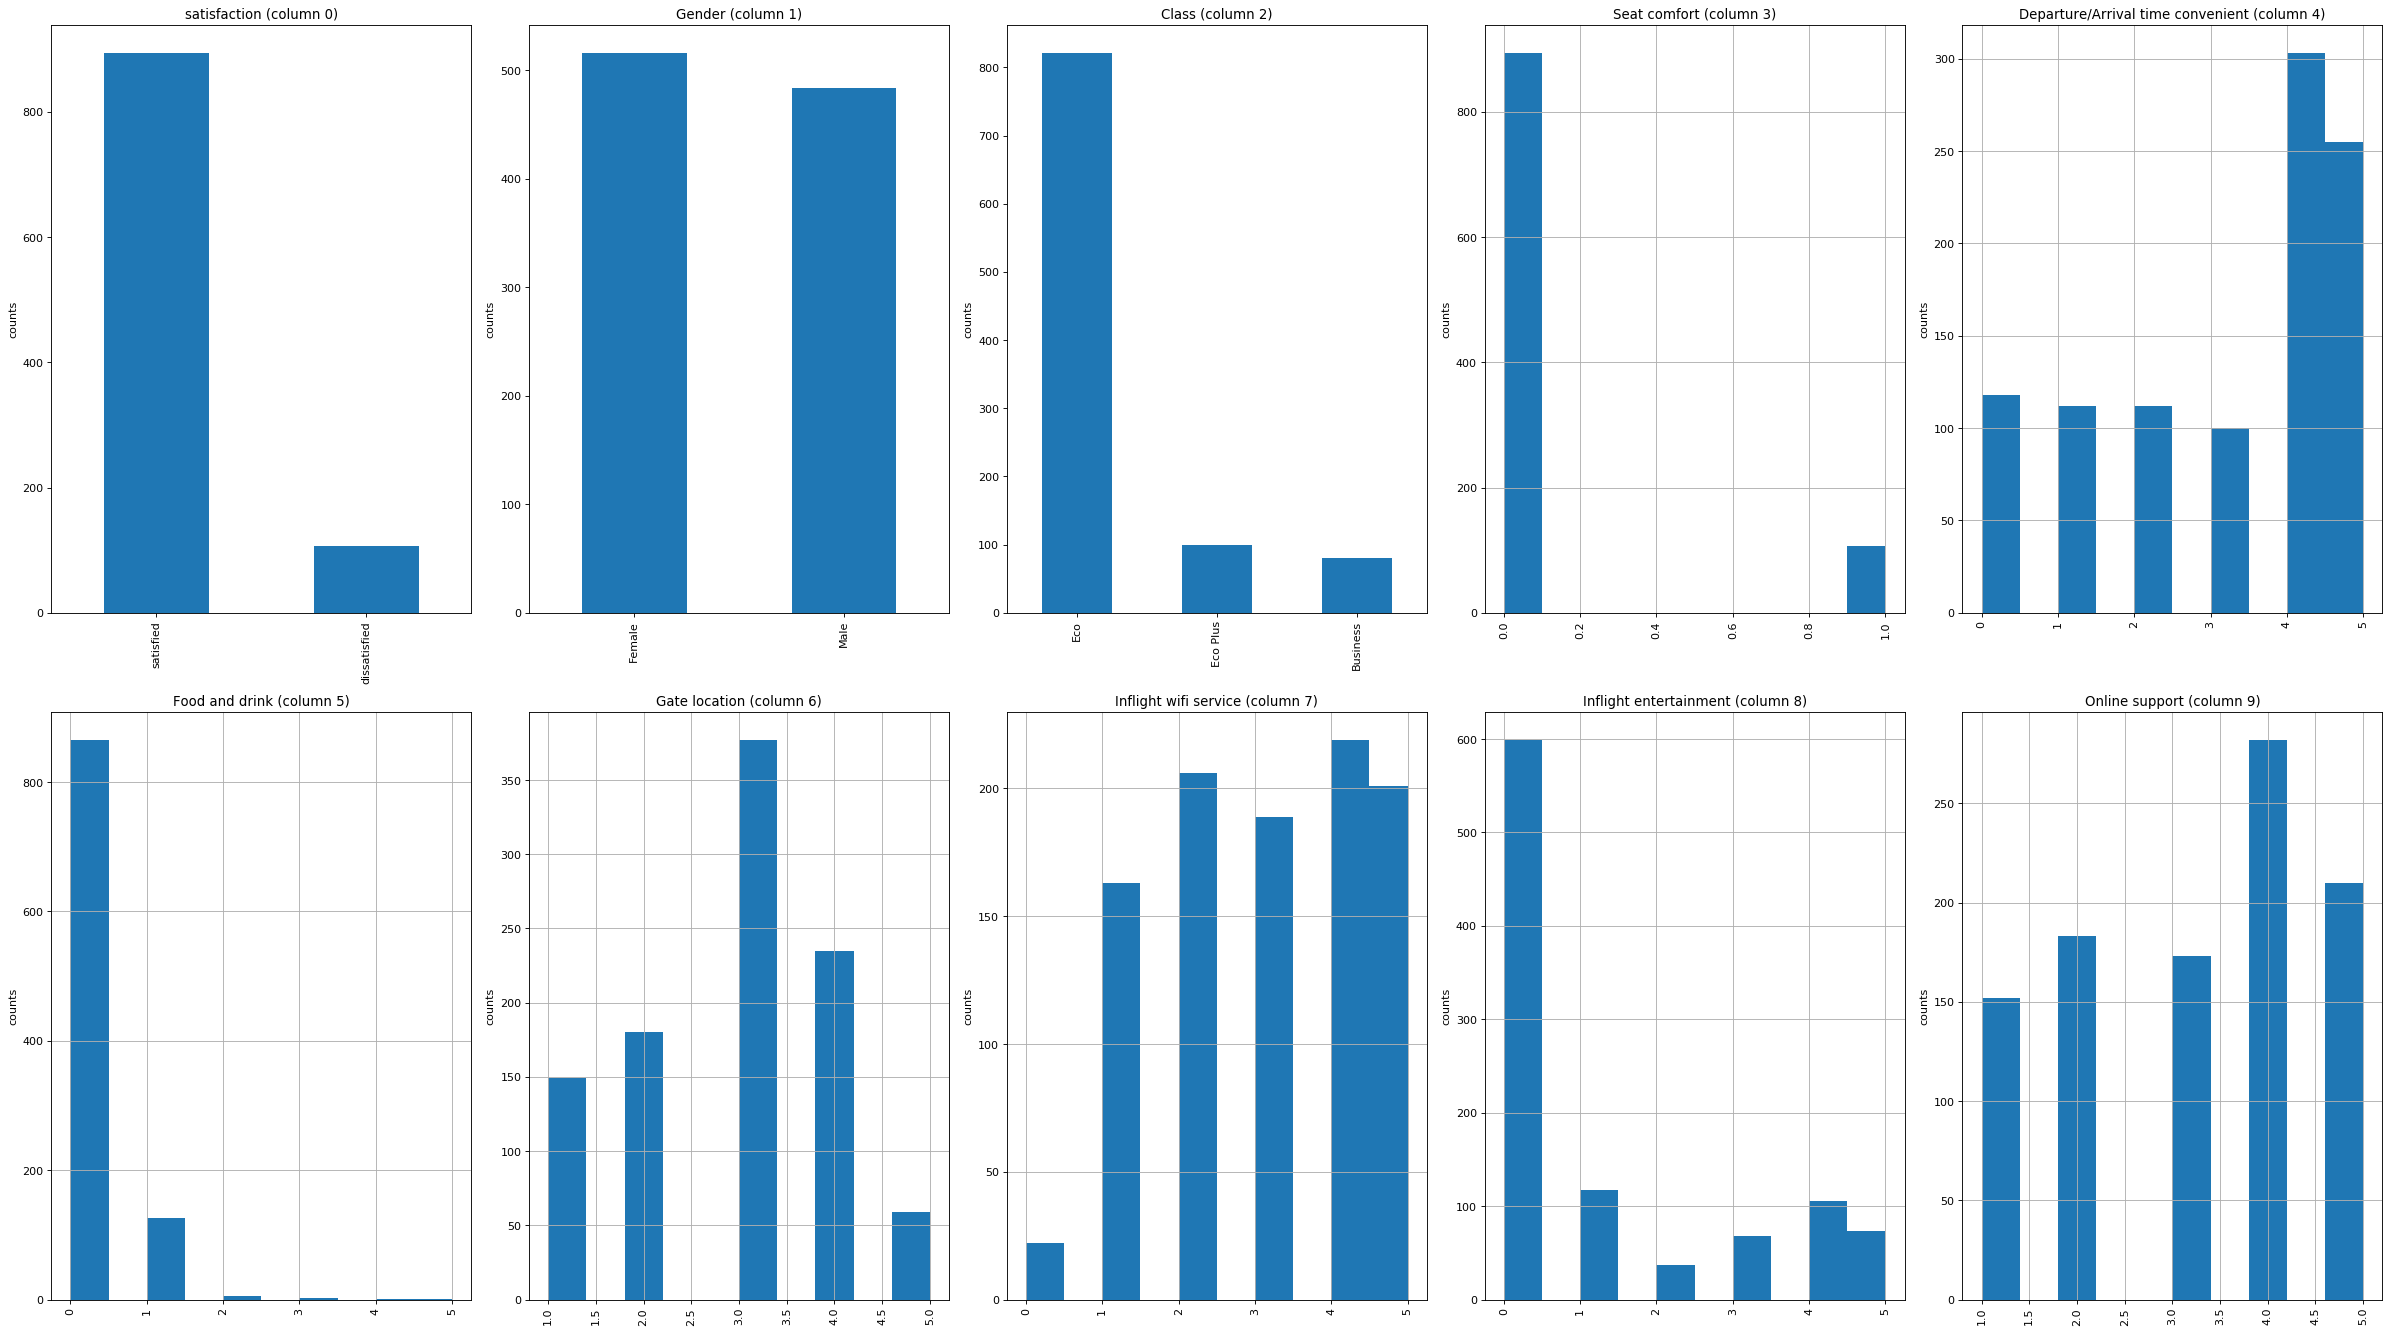

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

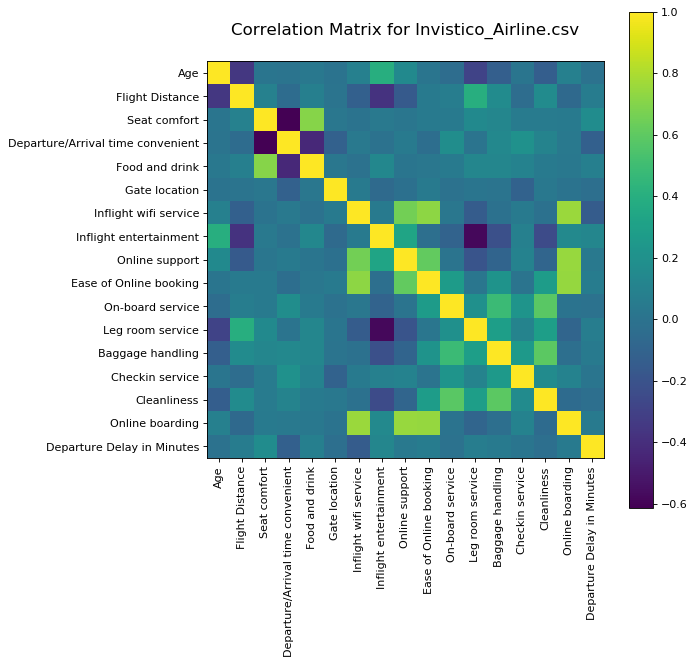

In [ ]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

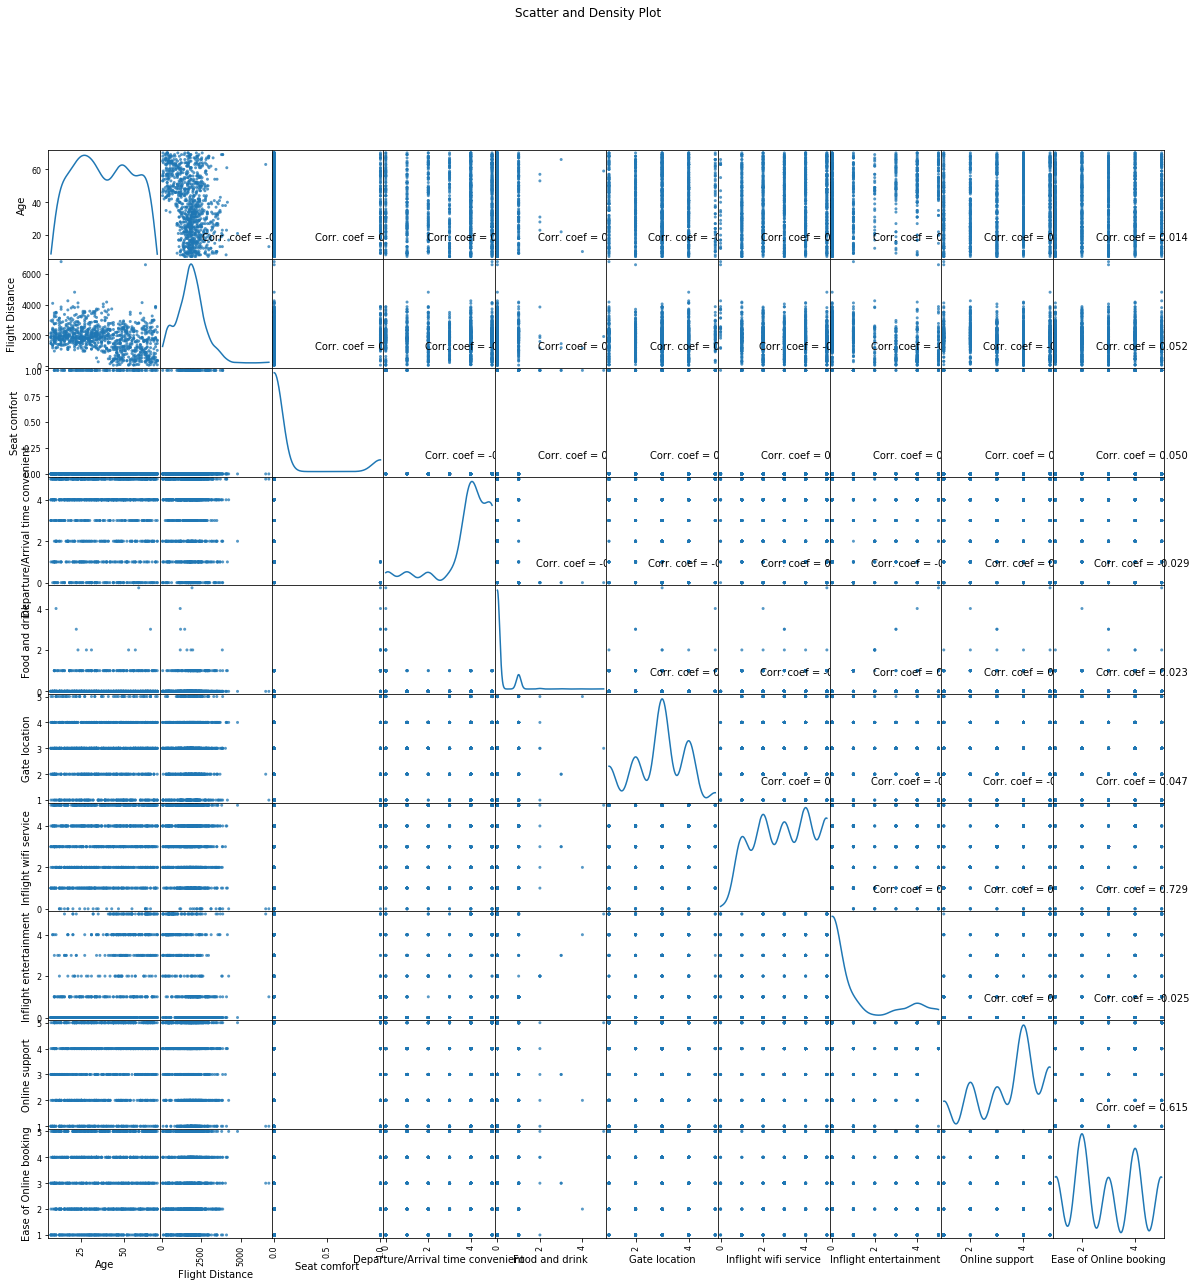

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [ ]:
df.columns
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Arrival Delay in Minutes']); 
plt.show()
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Departure Delay in Minutes']); 
plt.show()
#heatmap
# increase size
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df.corr(),annot=True)
sns.boxplot(data = df, x='Customer Type', y='Age')
sns.countplot(data = df, x = 'Class')
plt.figure(figsize=(10,10))
plt.title("Gender")
df["Gender"].value_counts().plot(kind="pie",autopct='%1.2f%%')
col=df.columns
lbl=LabelEncoder()
df['satisfaction']=lbl.fit_transform(df['satisfaction'])
gen=lbl.fit(df['Gender'])
df['Gender']=gen.transform(df['Gender'])
cus=lbl.fit(df['Customer Type'])
df['Customer Type']=cus.transform(df['Customer Type'])
ty=lbl.fit(df['Type of Travel'])
df['Type of Travel']=ty.transform(df['Type of Travel'])
cla=lbl.fit(df['Class'])
df['Class']=cla.transform(df['Class'])

df_normal= df.sample(7000,random_state=10)

In [ ]:
col=df.columns
# for i in col:
#     if df[i].dtype=='object':
#         lbl=LabelEncoder()
#         fitting_encoding=lbl.fit(df[i])
#         df[i]=lbl.transform(df[i])
lbl=LabelEncoder()
df['satisfaction']=lbl.fit_transform(df['satisfaction'])
gen=lbl.fit(df['Gender'])
df['Gender']=gen.transform(df['Gender'])
cus=lbl.fit(df['Customer Type'])
df['Customer Type']=cus.transform(df['Customer Type'])
ty=lbl.fit(df['Type of Travel'])
df['Type of Travel']=ty.transform(df['Type of Travel'])
cla=lbl.fit(df['Class'])
df['Class']=cla.transform(df['Class'])


df_normal= df.sample(7000,random_state=10)
df_normal

In [ ]:
sns.lmplot(x="Class", y="Flight Distance", data=df)
plt.show()
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
df = scaling.fit_transform(df)
df = pd.DataFrame(df, columns=col)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)
features=df.drop(['satisfaction'] , axis=1)
target = df.satisfaction
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of logistic regression classifier on training set:')
print(logreg.score(X_train, y_train))
classs=classification_report(y_train,logreg.predict(X_train))
print(classs)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of SVM classifier on test set:')
print(clf.score(X_test, y_test))
classs=classification_report(y_test,y_pred)
print(classs)
pca = PCA(n_components=14)
a=pca.fit(features)
pca_array=pca.transform(features)
pca_df=pd.DataFrame(pca_array)
pca_df.head()
plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(pca_df)

In [ ]:
# train_test split of pca_df
features_pca=pca_df.drop(['y'] , axis=1)
target_pca = pca_df.y
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, target_pca, test_size=0.3, random_state=10)
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train_pca, y_train_pca)
y_pred_pca=clf2.predict(X_test_pca)
print('Accuracy of SVM classifier on test set:')
print(clf2.score(X_test_pca, y_test_pca))
classs=classification_report(y_test_pca,y_pred_pca)
print(classs)
pca = PCA(n_components=10)
pca.fit(features)
pca_array=pca.transform(features)
pca_df2=pd.DataFrame(pca_array)
pca_df2

In [ ]:
pca_df2_full=pd.concat([pca_df2,target_pca],axis=1)
plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df2_full)
x_train2, x_test2, y_train2, y_test2 = train_test_split(pca_df2, target, test_size=0.3, random_state=10)
# running svm
clf3 = svm.SVC(kernel='linear')
clf3.fit(x_train2, y_train2)
y_pred_pca2=clf3.predict(x_test2)
print('Accuracy of SVM classifier on test set:')
print(clf3.score(x_test2, y_test2))
classs=classification_report(y_test2,y_pred_pca2)
print(classs)